# Порівняння швикості сортування Insert, Merge і Timsort (бібліотечна версія)

In [65]:
import random
import timeit
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import itertools
from matplotlib import pyplot as plt
import seaborn as sns

def get_ds(number):
    random_data = [random.randint(0, number) for _ in range(number)]
    sorted_data = sorted(random_data)
    reversed_data = sorted_data[::-1]
    return random_data, sorted_data, reversed_data

def test(algorithm, data):
    data_copy = data.copy()
    start_time = timeit.default_timer()
    algorithm(data_copy)
    end_time = timeit.default_timer()
    return end_time - start_time


def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key

def merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr) // 2
        L = arr[:mid]
        R = arr[mid:]

        merge_sort(L)
        merge_sort(R)

        i = j = k = 0

        while i < len(L) and j < len(R):
            if L[i] < R[j]:
                arr[k] = L[i]
                i += 1
            else:
                arr[k] = R[j]
                j += 1
            k += 1

        while i < len(L):
            arr[k] = L[i]
            i += 1
            k += 1

        while j < len(R):
            arr[k] = R[j]
            j += 1
            k += 1


repetitions = 1

results = []
algorythms = { 'Insert': lambda x: insertion_sort(x), 'Merge': lambda x: merge_sort(x), 'Timsort': lambda x: sorted(x) }

sizes = [ x[0] * x[1] for x in (itertools.product([x for x in [1, 3, 5, 8]], [10, 100, 1000, 10000])) ]

for size in sizes:

    random_ds, sorted_ds, reversed_ds = get_ds(size)

    dstype = { 'random': random_ds, 'sorted': sorted_ds, 'reversed': reversed_ds }

    for alg_name, alg_code in algorythms.items():

        for dstype_name in dstype:
            ds = dstype[dstype_name]

            for attempt in range(repetitions):

                #print(f"Test size {size} for {alg_name} for {dstype_name} dataset, attempt {attempt}")

                time = test(alg_code, ds)

                results.append({'alg': alg_name, 'attempt': attempt, 'size': size, 'time': time, 'dstype': dstype_name })


# Аналіз результатів


In [74]:
df = pd.DataFrame(results)
del df['attempt']
df

,alg,size,time,dstype
0,Insert,10,0.000014,random
1,Insert,10,0.000004,sorted
2,Insert,10,0.000012,reversed
3,Merge,10,0.000035,random
4,Merge,10,0.000023,sorted
...,...,...,...,...
139,Merge,80000,0.409161,sorted
140,Merge,80000,0.405869,reversed
141,Timsort,80000,0.021221,random
142,Timsort,80000,0.001377,sorted


## Аналіз сортування масива з випадковим розташуванням

In [75]:
df_random = pd.DataFrame([x for x in results if x['dstype'] == 'random'])
del df_random['attempt']
del df_random['dstype']
df_random

,alg,size,time
0,Insert,10,0.000014
1,Merge,10,0.000035
2,Timsort,10,0.000002
3,Insert,100,0.000614
4,Merge,100,0.000456
5,Timsort,100,0.000018
6,Insert,1000,0.042915
7,Merge,1000,0.003388
8,Timsort,1000,0.000134
9,Insert,10000,4.903377


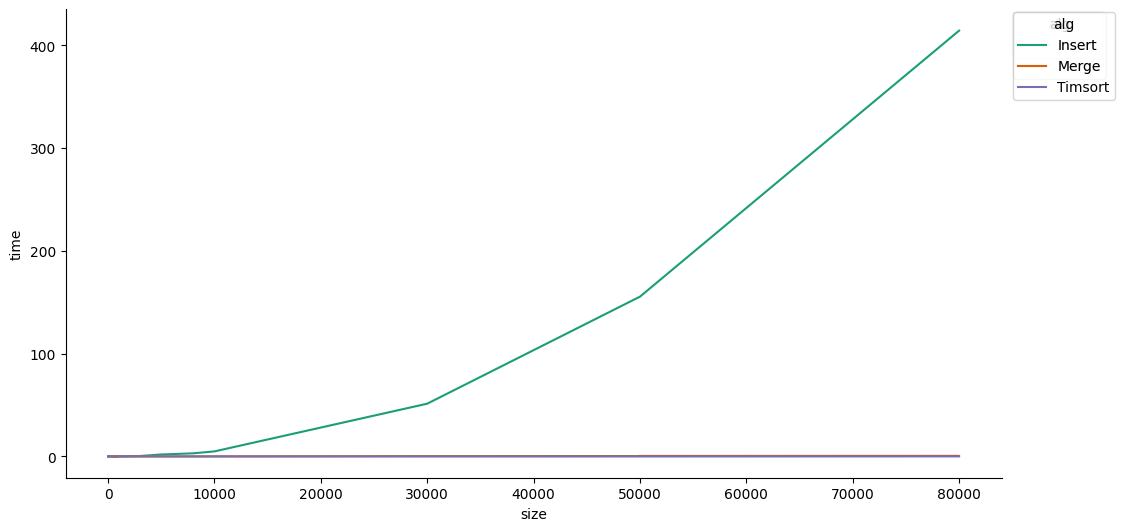

In [76]:
# @title Залежність розміру від часу сортування вибірки

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['size']
  ys = series['time']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_random.sort_values('time', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('alg')):
  _plot_series(series, series_name, i)
  fig.legend(title='alg', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('size')
_ = plt.ylabel('time')

Text(0.5, 1.0, 'Merge vs Timsort')

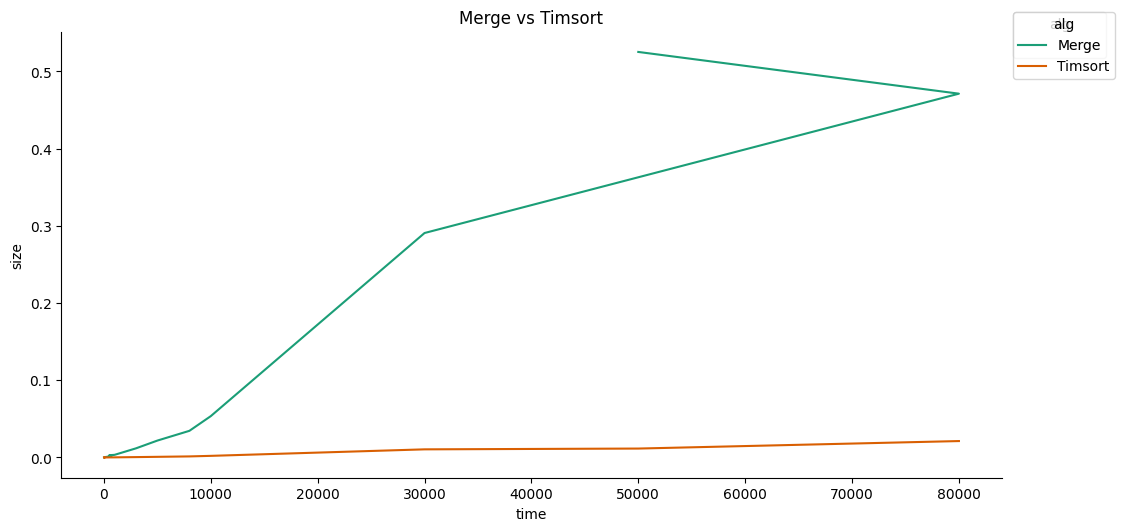

In [77]:
# @title Залежність розміру від часу сортування вибірки (Merge vs Timsort)

df_ = df_random[df_random['alg'] != 'Insert']

def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['size']
  ys = series['time']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_.sort_values('time', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('alg')):
  _plot_series(series, series_name, i)
  fig.legend(title='alg', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time')
_ = plt.ylabel('size')

plt.title("Merge vs Timsort")

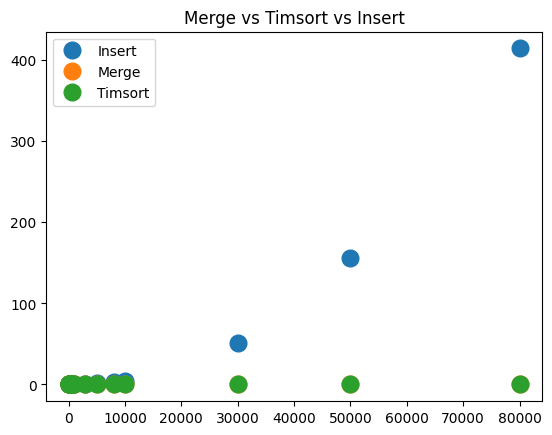

In [78]:
# @title Залежність часу від розміру вибірки

# all algorythims
groups = df_random.groupby('alg')
for name, group in groups:
    plt.plot(group['size'], group['time'], marker='o', linestyle='', markersize=12, label=name)
plt.title("Merge vs Timsort vs Insert")
plt.legend()


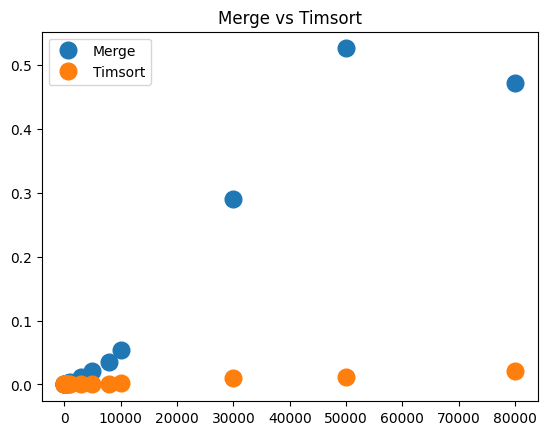

In [79]:
# w/o insert algorythims
groups = df_random[df_random['alg'] != 'Insert'].groupby('alg')
for name, group in groups:
    plt.plot(group['size'], group['time'], marker='o', linestyle='', markersize=12, label=name)
plt.title("Merge vs Timsort")
plt.legend()


### Висновок

На масиві випадково розташованих  елементів Timsort показує найкращі результати

Merge sort є менш ефективним ніж Timsort (і він показує теж лінійну складність порівнюючи з Timsort) але він є порівняно набагато ефективнішим ніж сортування ставками

Наймешн ефективним є сортування вставками оскільки час зростає лінійно  

## Аналіз сортування вже сортованого масиву (best case)

In [80]:
df_sorted = pd.DataFrame([x for x in results if x['dstype'] == 'sorted'])
del df_sorted['attempt']
del df_sorted['dstype']
df_sorted

,alg,size,time
0,Insert,10,3.997000e-06
1,Merge,10,2.306300e-05
2,Timsort,10,1.087000e-06
3,Insert,100,2.661700e-05
4,Merge,100,4.219550e-04
5,Timsort,100,2.184000e-06
6,Insert,1000,2.198130e-04
7,Merge,1000,2.805040e-03
8,Timsort,1000,1.064400e-05
9,Insert,10000,2.508780e-03


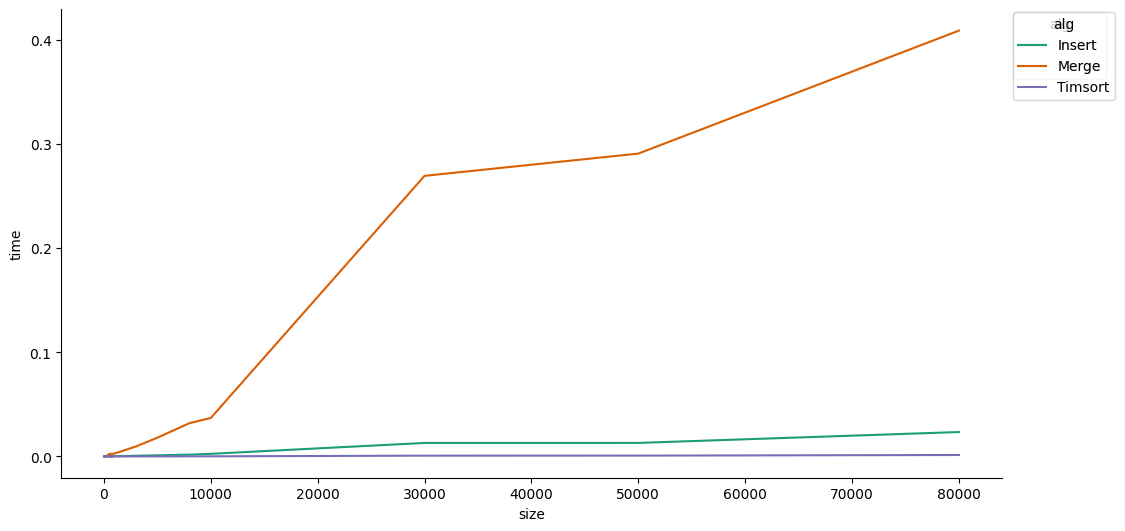

In [81]:
# @title Залежність часу від розміру вибірки

def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['size']
  ys = series['time']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted_ = df_sorted.sort_values('time', ascending=True)
for i, (series_name, series) in enumerate(df_sorted_.groupby('alg')):
  _plot_series(series, series_name, i)
  fig.legend(title='alg', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('size')
_ = plt.ylabel('time')

Text(0.5, 1.0, 'Merge vs Timsort')

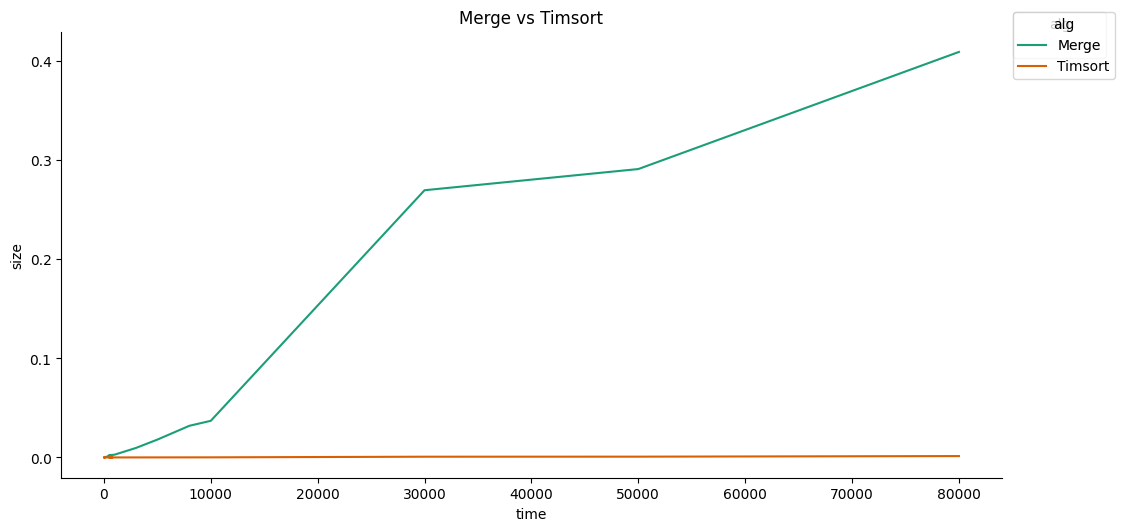

In [82]:
df_ = df_sorted[df_sorted['alg'] != 'Insert']

def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['size']
  ys = series['time']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted_ = df_.sort_values('time', ascending=True)
for i, (series_name, series) in enumerate(df_sorted_.groupby('alg')):
  _plot_series(series, series_name, i)
  fig.legend(title='alg', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time')
_ = plt.ylabel('size')

plt.title("Merge vs Timsort")

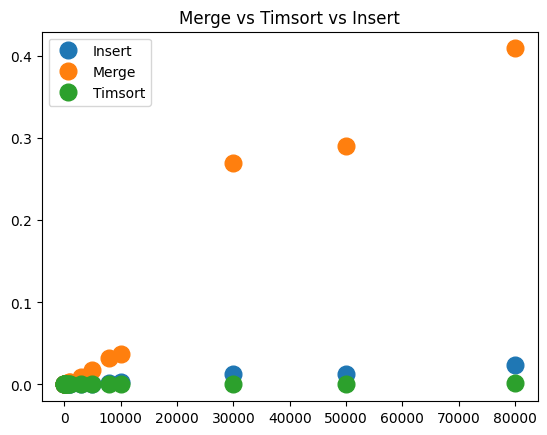

In [83]:
# all algorythims
groups = df_sorted.groupby('alg')
for name, group in groups:
    plt.plot(group['size'], group['time'], marker='o', linestyle='', markersize=12, label=name)
plt.title("Merge vs Timsort vs Insert")
plt.legend()


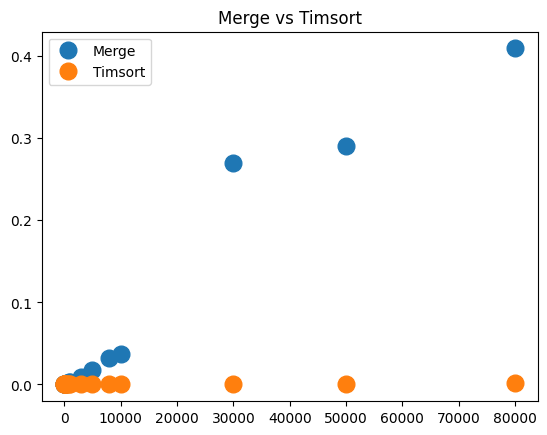

In [84]:
# w/o insert algorythims
groups = df_sorted[df_sorted['alg'] != 'Insert'].groupby('alg')
for name, group in groups:
    plt.plot(group['size'], group['time'], marker='o', linestyle='', markersize=12, label=name)
plt.title("Merge vs Timsort")
plt.legend()


## Аналіз зворотньо сортованого масиву (worst case)



In [85]:
df_reversed = pd.DataFrame([x for x in results if x['dstype'] == 'reversed'])
del df_reversed['attempt']
del df_reversed['dstype']
df_reversed


,alg,size,time
0,Insert,10,0.000012
1,Merge,10,0.000023
2,Timsort,10,0.000001
3,Insert,100,0.002177
4,Merge,100,0.000453
5,Timsort,100,0.000008
6,Insert,1000,0.088844
7,Merge,1000,0.002819
8,Timsort,1000,0.000054
9,Insert,10000,10.975024


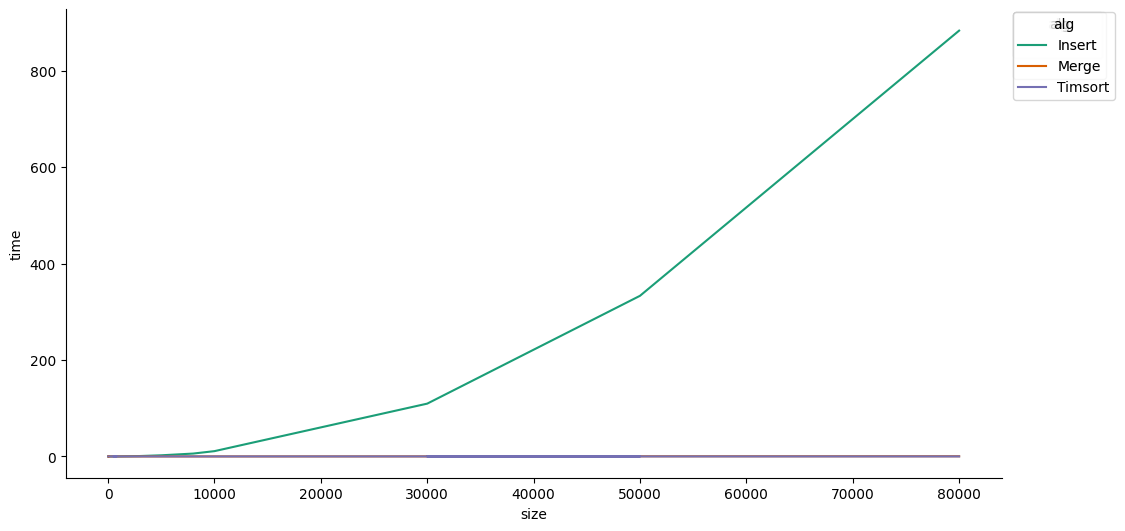

In [86]:
# @title Залежність часу від розміру вибірки

def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['size']
  ys = series['time']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted_ = df_reversed.sort_values('time', ascending=True)
for i, (series_name, series) in enumerate(df_sorted_.groupby('alg')):
  _plot_series(series, series_name, i)
  fig.legend(title='alg', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('size')
_ = plt.ylabel('time')

Text(0.5, 1.0, 'Merge vs Timsort')

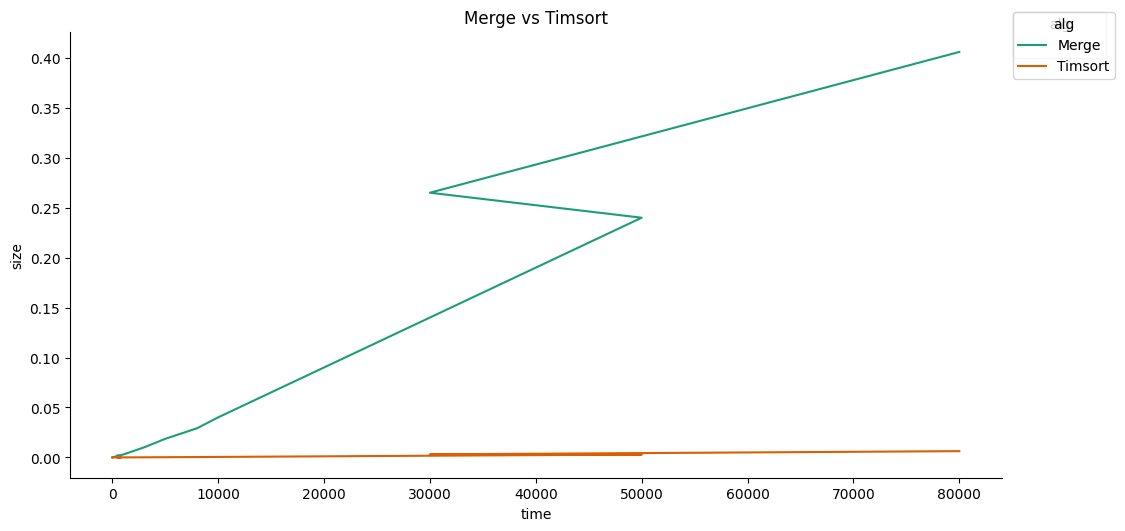

In [87]:
df_ = df_reversed[df_reversed['alg'] != 'Insert']

def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['size']
  ys = series['time']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted_ = df_.sort_values('time', ascending=True)
for i, (series_name, series) in enumerate(df_sorted_.groupby('alg')):
  _plot_series(series, series_name, i)
  fig.legend(title='alg', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time')
_ = plt.ylabel('size')

plt.title("Merge vs Timsort")

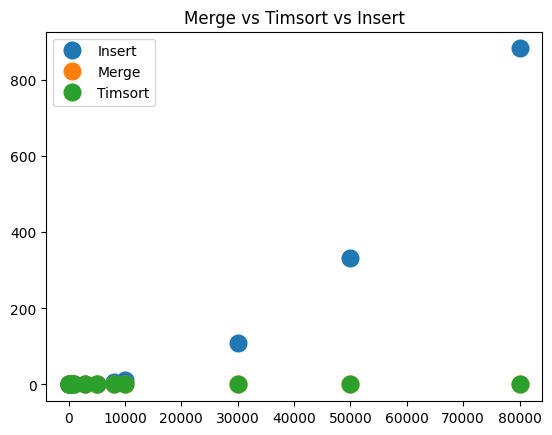

In [88]:
# all algorythims
groups = df_reversed.groupby('alg')
for name, group in groups:
    plt.plot(group['size'], group['time'], marker='o', linestyle='', markersize=12, label=name)
plt.title("Merge vs Timsort vs Insert")
plt.legend()


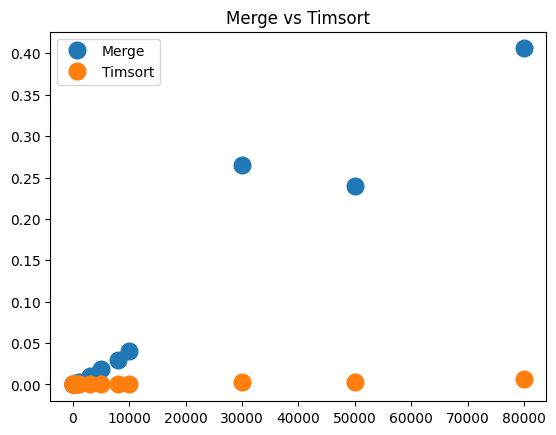

In [89]:
# w/o insert algorythims
groups = df_reversed[df_reversed['alg'] != 'Insert'].groupby('alg')
for name, group in groups:
    plt.plot(group['size'], group['time'], marker='o', linestyle='', markersize=12, label=name)
plt.title("Merge vs Timsort")
plt.legend()


### Висновок

На масиві вже сортованих і зворотньо сортованих  елементів Timsort, merge sort і insert sort показуюють такі самі результати як і на масиві з випадково розташованих елементів (порівнюючи алгорими між собою а не випадки роботи з сортованими/несортованими даними)

# Фінальні висновки

Insertion Sort має за перевагу тільки простоту реалізації і стабільність і призначений для роботи з невеликими кількостями даних і має недолік - непрактичний для великих наборів даних через високу часову складність.

Merge Sort - через часову вкладність O(n log n) у всіх випадках (найгірший, середній, найкращий) він проявляє себе доволі добре на всіх наборах даних, але треба брати до уваги використання додаткової пам'яті

Timsort - через часову складність O(n log n) у середньому та найгіршому випадках і O(n) у найкращому випадку прекрасно підходить для роботи з будьякої кількістю даних.

Зауваження - ми порівнювали 2 самописні реалізації Merge Sort і Insertion Sort з бібліотечною реалізацією Timsort

Оскільки Merge Sort і Timsort мають однакову складність вони мали би показати однакові результати на зворотньо сортованом і випадково сортованому масиві

Ми ж бачимо що Timsort є ефективнішим за Merge sort  
Причина - бібліотечна реалізація написана і тестована багатьма компаніями і організаціями що дозволяє припустити що вона містить оптимізації які і дозволяють працювати алгоритму швидше.